In [1]:
#Importing the libraries
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import linear_model,  metrics

from sklearn.preprocessing import MinMaxScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import LocalOutlierFactor

Machine learning, more specifically the field of predictive modeling, is primarily focused on minimizing a model's error or producing the most accurate predictions at the expense of explainability. In order to achieve these goals, applied machine learning will appropriate, recycle, and burrow algorithms from a variety of disciplines, including statistics.

As a result, machine learning has adapted linear regression, which was created in the field of statistics and is studied as a model for understanding the relationship between input and output numerical variables. It is a machine learning algorithm as well as a statistical algorithm.

In [2]:
df_21_22 = pd.read_excel(r'C:\Users\Daraz\Desktop\Data_2021_2022.xlsx')

In [3]:
df_21_22.head()

,date_id,Knowledge Count,Chats,Sessions,Direct Live Agent Sessions,Resolved Sessions,Session Resolved Rate,Session No Answer Rate,Switch to Live Agent Rate,Session Rec Not Accepted Rate,Session Unsatisfied Rate,Click to Live Agent Sessions,Click to Live Agent Rate,Intention to Live Agent Sessions,Intention to Live Agent Rate
0,20210101,2,6842,3033,771,1165,0.515031,0.068081,0.348806,0.008400,0.078249,647,0.286030,314,0.138815
1,20210102,2,7816,3307,660,1469,0.554968,0.066490,0.311296,0.009822,0.071024,664,0.250850,346,0.130714
2,20210103,2,8747,3631,813,1482,0.525905,0.068133,0.328247,0.009936,0.065649,733,0.260114,412,0.146203
3,20210104,2,8429,3498,830,1410,0.528486,0.075712,0.324963,0.009745,0.061094,762,0.285607,356,0.133433
4,20210105,2,8460,3559,761,1537,0.549321,0.067548,0.324875,0.008220,0.074339,744,0.265904,356,0.127234


In [4]:
df_21_22.shape

(635, 15)

In [6]:
df_21_22.columns

Index(['date_id', 'Knowledge Count', 'Chats', 'Sessions',
       'Direct Live Agent Sessions', 'Resolved Sessions',
       'Session Resolved Rate', 'Session No Answer Rate',
       'Switch to Live Agent Rate', 'Session Rec Not Accepted Rate',
       'Session Unsatisfied Rate', 'Click to Live Agent Sessions',
       'Click to Live Agent Rate', 'Intention to Live Agent Sessions',
       'Intention to Live Agent Rate'],
      dtype='object')

In [7]:
df_temp = df_21_22[['Chats', 'Sessions',
       'Direct Live Agent Sessions','Session Resolved Rate',
        'Session No Answer Rate', 'Resolved Sessions',
       'Switch to Live Agent Rate', 'Session Rec Not Accepted Rate',
       'Session Unsatisfied Rate', 'Click to Live Agent Sessions',
       'Click to Live Agent Rate', 'Intention to Live Agent Sessions',
       'Intention to Live Agent Rate']]

### What is Z-Score?
A standard score is a z score. In order to make interpretation easier, raw scores are transformed into standard scores (such as z scores, T scores, and IQ scores). A z score has a mean of zero and a standard deviation of 1. The formula is given as follows:

\begin{equation}
Z=\frac{x-\mu}{\sigma}
\end{equation}

where, 
- $Z=$ standard score
- $x=$ observed value
- $\mu=$ mean of the sample
- $\sigma=$ standard deviation of the sample

Please look into the [website][link] for more details.

[link]:https://journals.sagepub.com/doi/full/10.1177/02537176211046525

In [8]:

df_cln = df_temp[(np.abs(stats.zscore(df_temp)) < 3).all(axis=1)]

- For each column, it first computes the **Z-score** of each value in the column, relative to the column mean and standard deviation.

- It then takes the absolute **Z-score** because the direction does not matter, only if it is below the threshold.

- All(axis=1) ensures that for each row, all column satisfy the constraint.

- Finally, the result of this condition is used to index the dataframe.

In [9]:
df_cln.shape

(599, 13)

In [62]:
df_21_22['date_id'] = pd.to_datetime(df_21_22['date_id'], format='%Y%m%d')

c:\Users\Daraz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Session Resolved Rate')

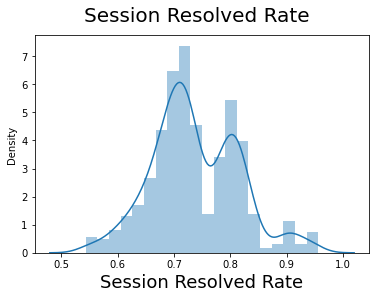

In [10]:
res = df_cln['Session Resolved Rate']
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Session Resolved Rate', fontsize = 20)                  # Plot heading 
plt.xlabel('Session Resolved Rate', fontsize = 18)                         # X-label

The session Resolved Rate column shows an almost Gaussian Distribution

<AxesSubplot:>

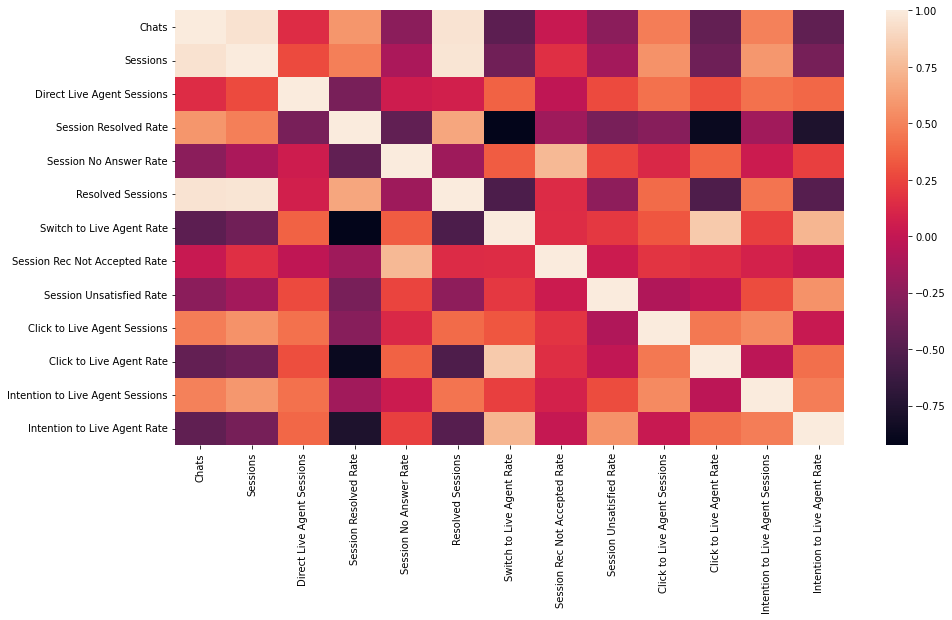

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df_cln.corr())


In [12]:
df_cln.corr()

,Chats,Sessions,Direct Live Agent Sessions,Session Resolved Rate,Session No Answer Rate,Resolved Sessions,Switch to Live Agent Rate,Session Rec Not Accepted Rate,Session Unsatisfied Rate,Click to Live Agent Sessions,Click to Live Agent Rate,Intention to Live Agent Sessions,Intention to Live Agent Rate
Chats,1.000000,0.951398,0.148530,0.581294,-0.249975,0.957186,-0.463334,0.014676,-0.251271,0.475096,-0.434938,0.491059,-0.448486
Sessions,0.951398,1.000000,0.275330,0.485054,-0.108954,0.969332,-0.371531,0.160415,-0.144270,0.568109,-0.383340,0.586512,-0.340405
Direct Live Agent Sessions,0.148530,0.275330,1.000000,-0.338082,0.047314,0.074417,0.367814,-0.021387,0.273462,0.424156,0.292215,0.426221,0.386560
Session Resolved Rate,0.581294,0.485054,-0.338082,1.000000,-0.441232,0.657786,-0.926241,-0.161787,-0.336947,-0.267697,-0.875434,-0.157849,-0.769110
Session No Answer Rate,-0.249975,-0.108954,0.047314,-0.441232,1.000000,-0.166863,0.343446,0.744211,0.253031,0.122755,0.360925,0.042661,0.229737
Resolved Sessions,0.957186,0.969332,0.074417,0.657786,-0.166863,1.000000,-0.541489,0.141544,-0.235496,0.405521,-0.533439,0.440045,-0.494547
Switch to Live Agent Rate,-0.463334,-0.371531,0.367814,-0.926241,0.343446,-0.541489,1.000000,0.143552,0.199163,0.320534,0.833523,0.225288,0.735041
Session Rec Not Accepted Rate,0.014676,0.160415,-0.021387,-0.161787,0.744211,0.141544,0.143552,1.000000,0.038783,0.185426,0.150935,0.089154,0.007666
Session Unsatisfied Rate,-0.251271,-0.144270,0.273462,-0.336947,0.253031,-0.235496,0.199163,0.038783,1.000000,-0.084154,-0.014079,0.277715,0.565577
Click to Live Agent Sessions,0.475096,0.568109,0.424156,-0.267697,0.122755,0.405521,0.320534,0.185426,-0.084154,1.000000,0.457359,0.528779,0.020035


In [13]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 19 to 634
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Chats                             599 non-null    int64  
 1   Sessions                          599 non-null    int64  
 2   Direct Live Agent Sessions        599 non-null    int64  
 3   Session Resolved Rate             599 non-null    float64
 4   Session No Answer Rate            599 non-null    float64
 5   Resolved Sessions                 599 non-null    int64  
 6   Switch to Live Agent Rate         599 non-null    float64
 7   Session Rec Not Accepted Rate     599 non-null    float64
 8   Session Unsatisfied Rate          599 non-null    float64
 9   Click to Live Agent Sessions      599 non-null    int64  
 10  Click to Live Agent Rate          599 non-null    float64
 11  Intention to Live Agent Sessions  599 non-null    int64  
 12  Intenti

In [14]:
round(100*(df_cln.isnull().sum()/len(df_cln)), 2).sort_values(ascending=False)

Chats                               0.0
Sessions                            0.0
Direct Live Agent Sessions          0.0
Session Resolved Rate               0.0
Session No Answer Rate              0.0
Resolved Sessions                   0.0
Switch to Live Agent Rate           0.0
Session Rec Not Accepted Rate       0.0
Session Unsatisfied Rate            0.0
Click to Live Agent Sessions        0.0
Click to Live Agent Rate            0.0
Intention to Live Agent Sessions    0.0
Intention to Live Agent Rate        0.0
dtype: float64

In [15]:
df_dup = df_cln.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_dup.drop_duplicates(subset=None, inplace=True)

In [16]:
df_dup.shape

(599, 13)

<AxesSubplot:xlabel='Sessions', ylabel='Count'>

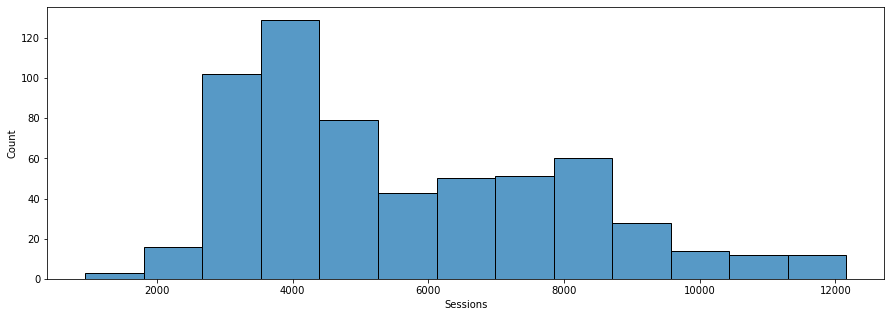

In [17]:
plt.figure(figsize=(15,5))
sns.histplot(x ='Sessions',data = df_cln)

<AxesSubplot:xlabel='Resolved Sessions', ylabel='Count'>

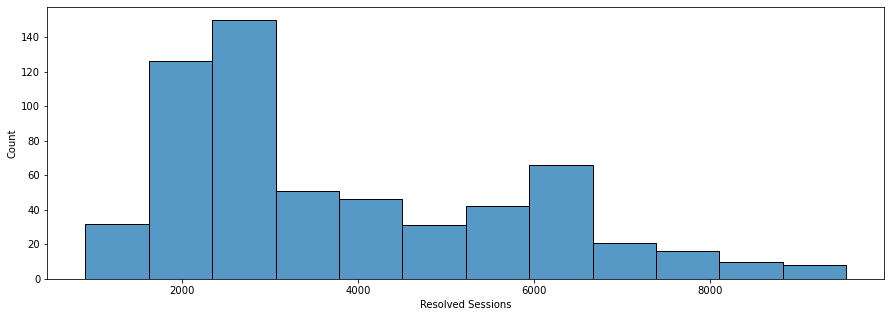

In [18]:
plt.figure(figsize=(15,5))
sns.histplot(x ='Resolved Sessions',data = df_cln)


<AxesSubplot:xlabel='Direct Live Agent Sessions', ylabel='Count'>

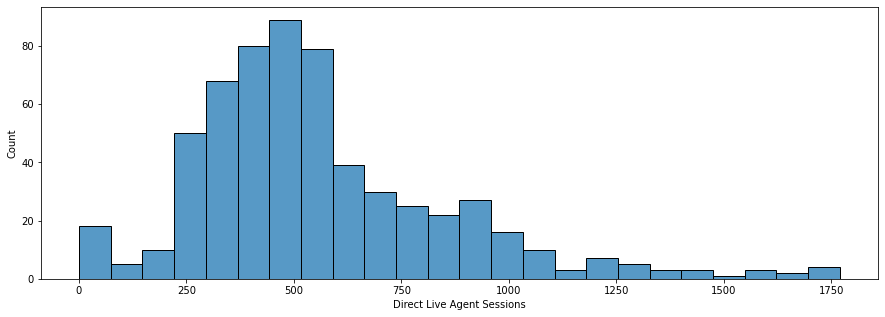

In [19]:
plt.figure(figsize=(15,5))
sns.histplot(x ='Direct Live Agent Sessions',data = df_cln)


In [17]:
X = df_21_22[['Sessions', 'Direct Live Agent Sessions', 'Resolved Sessions']]


In [18]:
y = df_21_22['Session Resolved Rate']

### Splitting the dataset

In [20]:
df_train, df_test = train_test_split(df_cln, test_size = 0.3, random_state = 70)

In [21]:
df_train.shape

(419, 13)

In [22]:
df_test.shape

(180, 13)

### EXPLORATORY DATA ANALYSIS

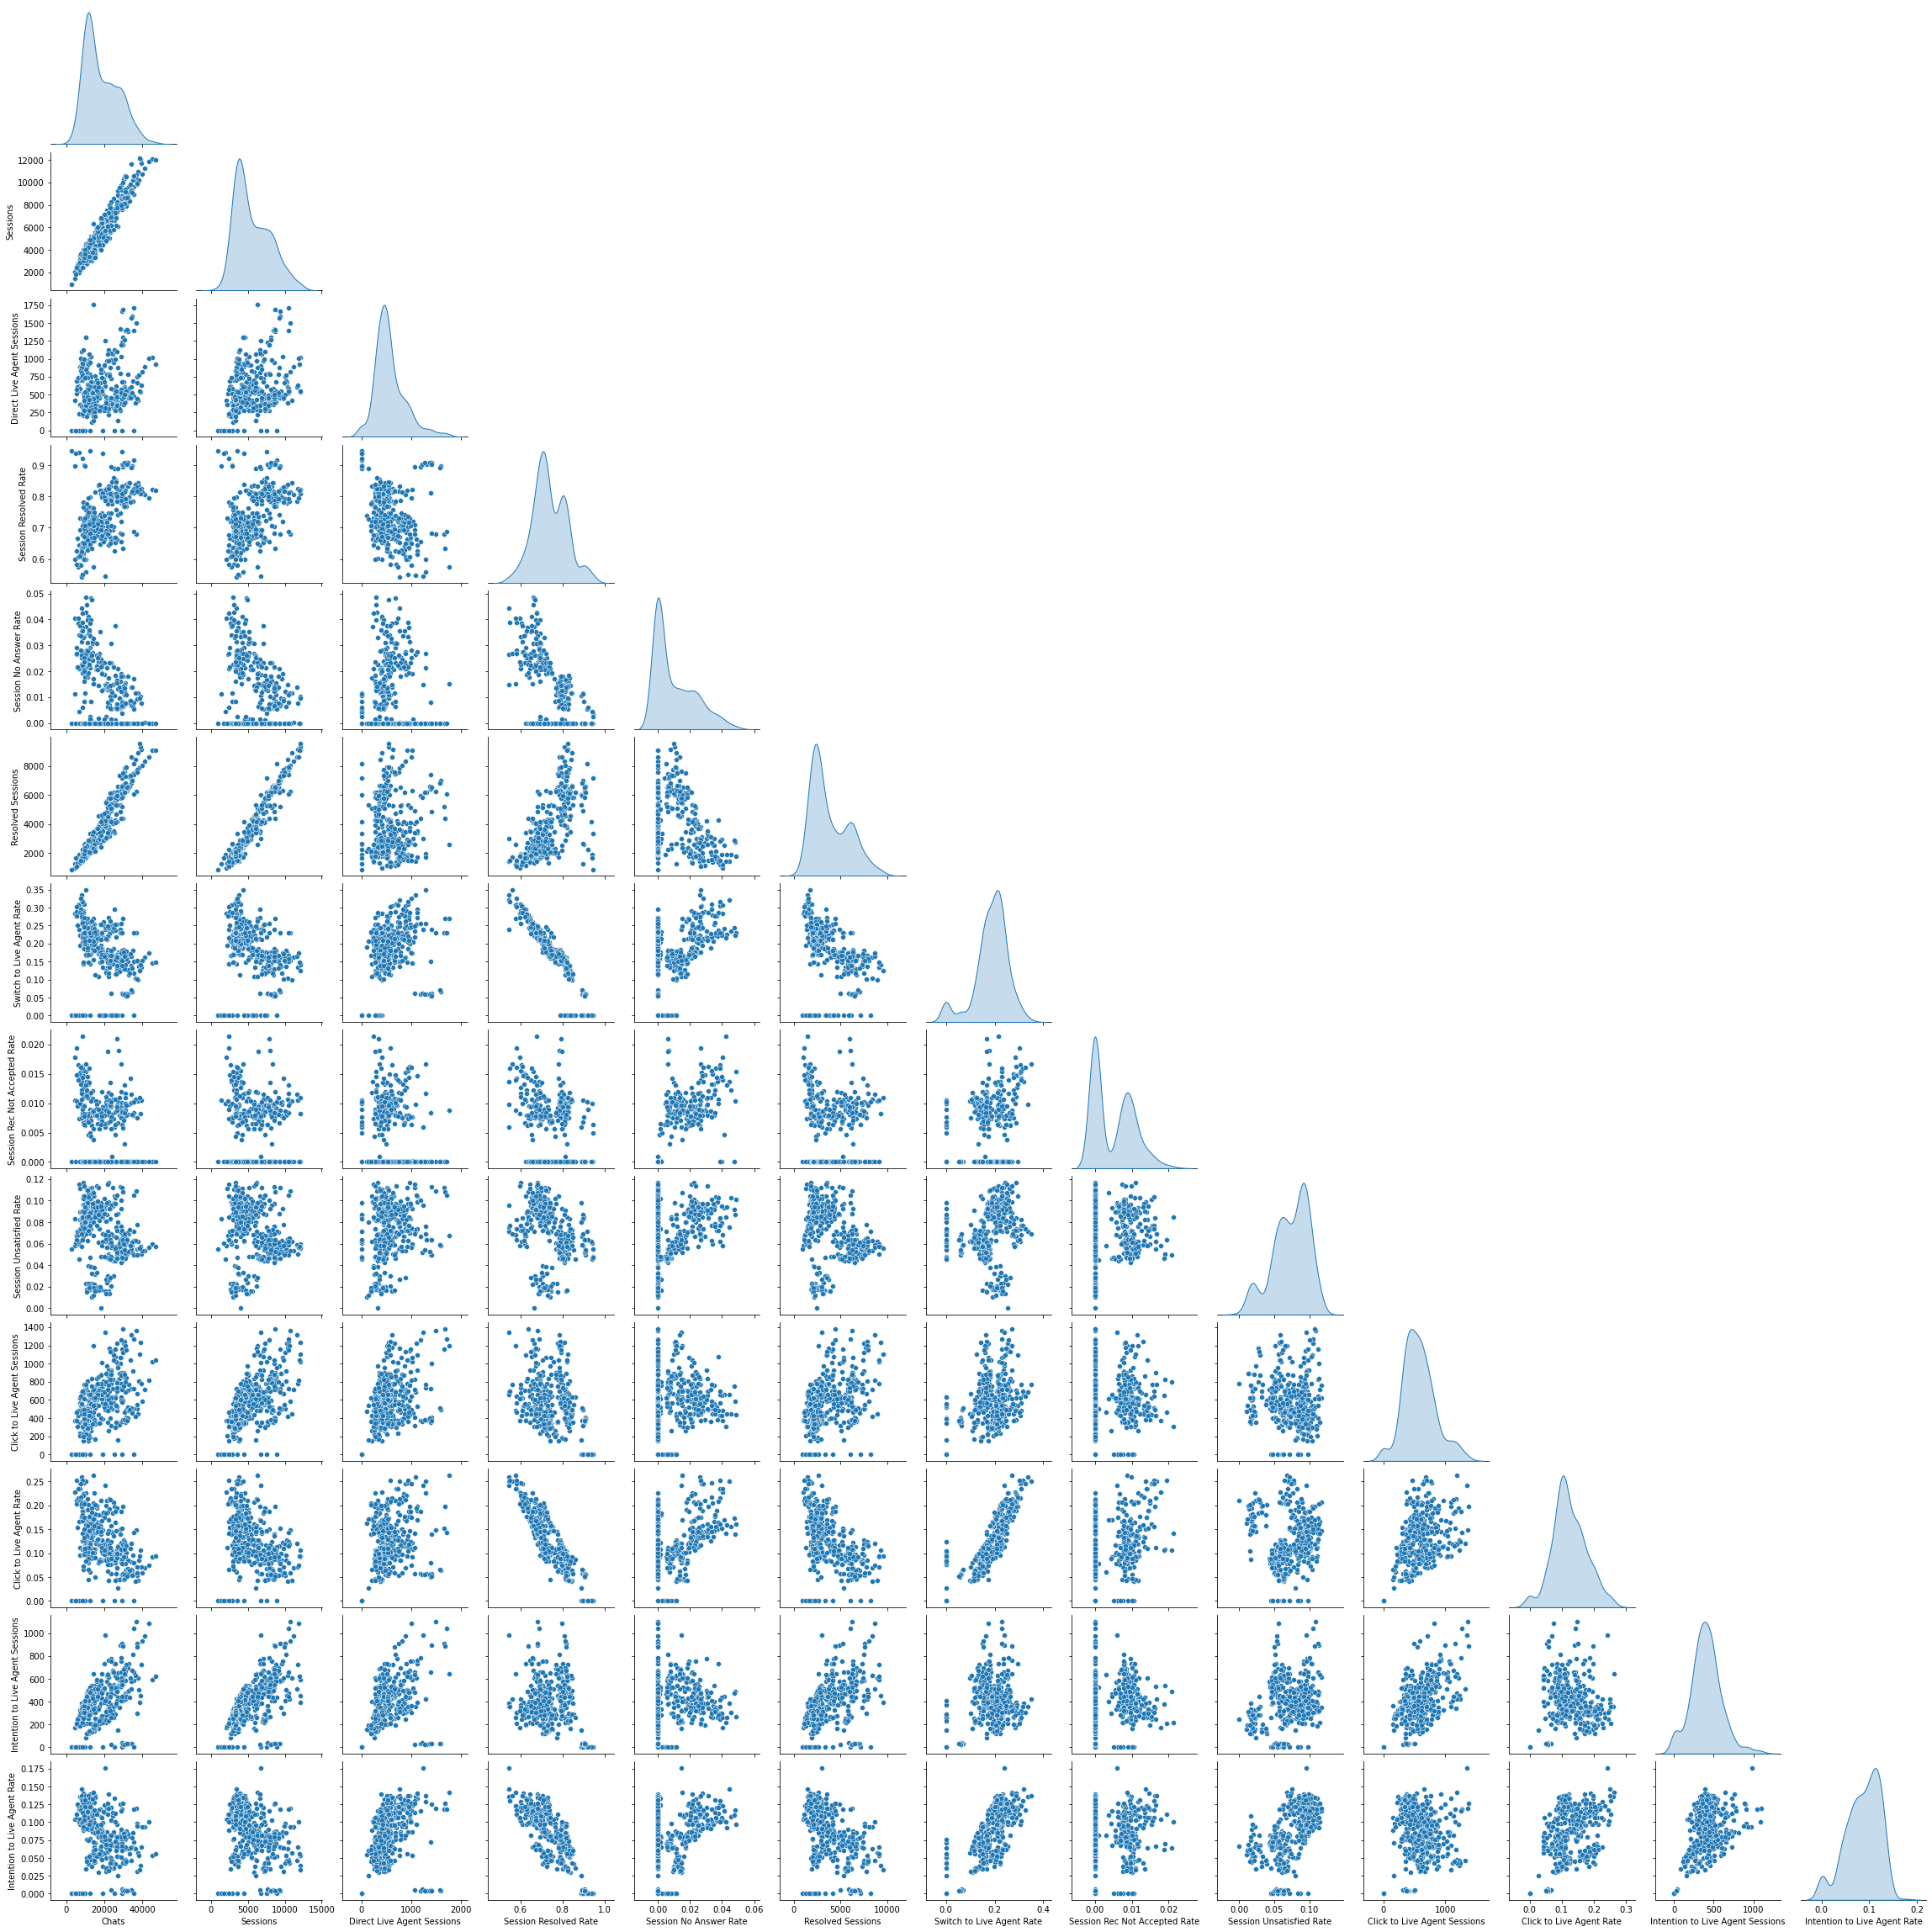

In [23]:
sns.pairplot(df_train, diag_kind='kde', corner=True)
plt.show()

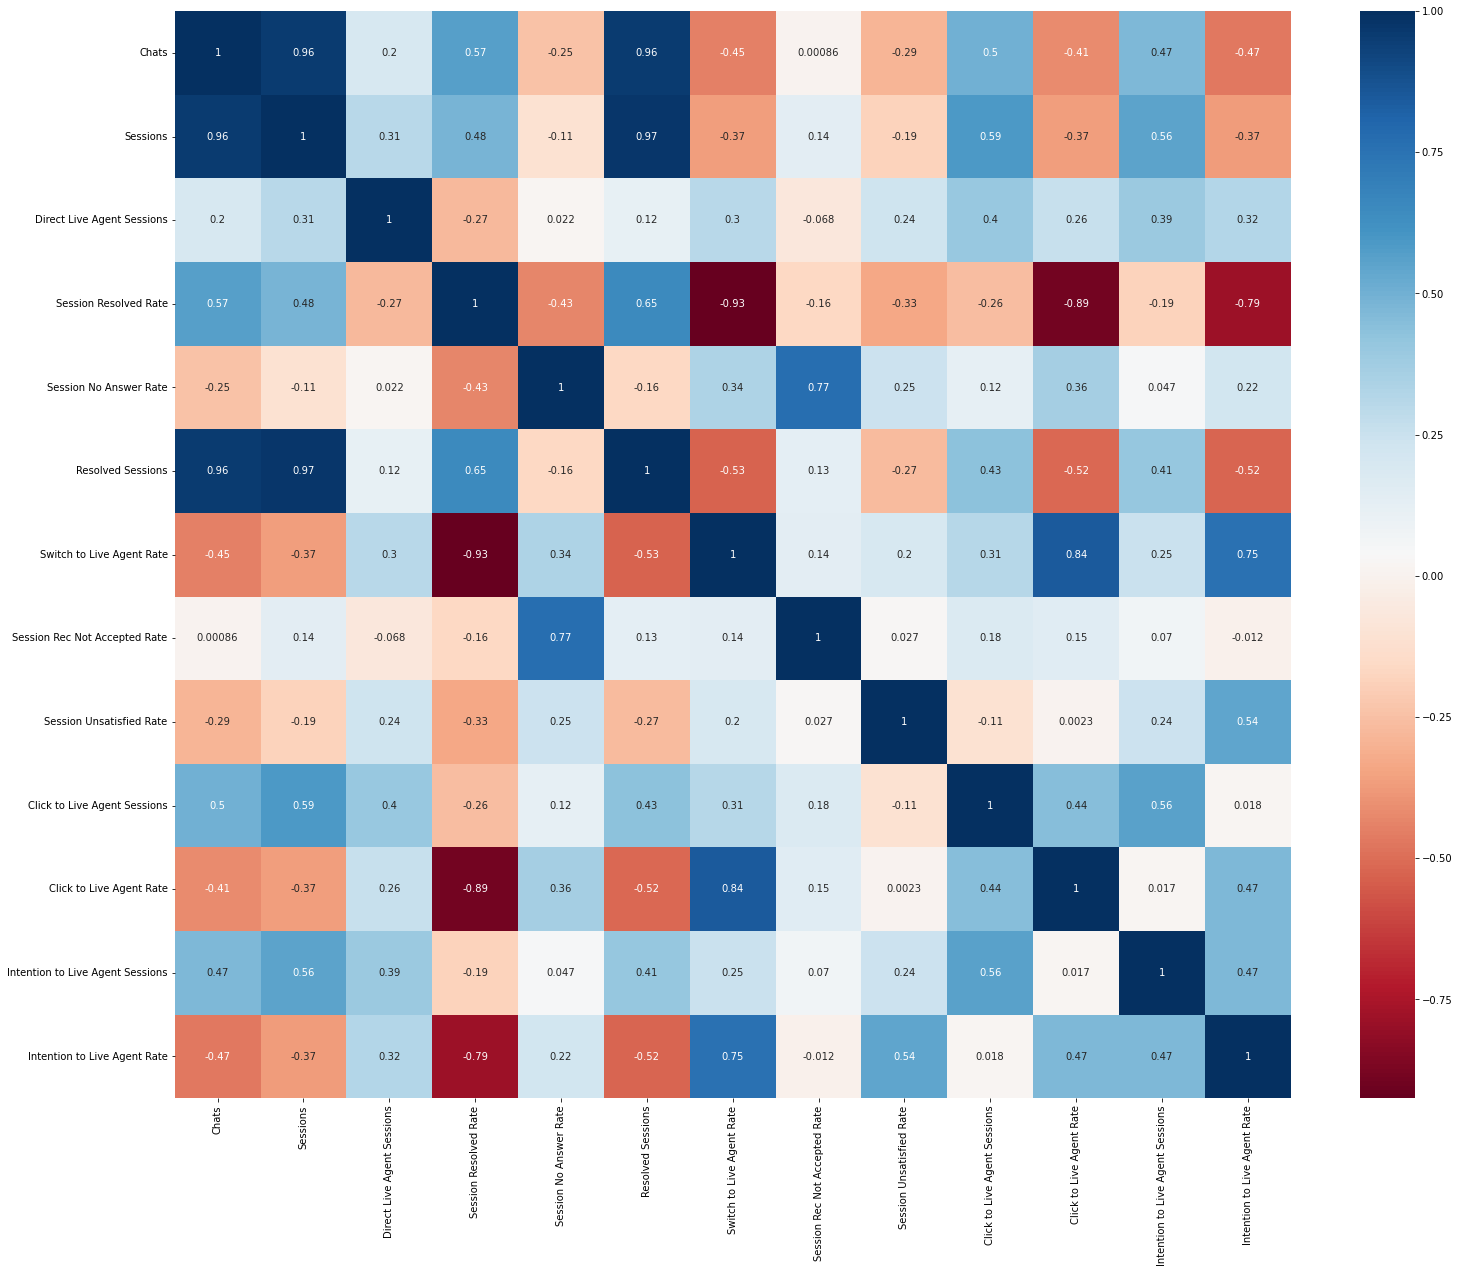

In [24]:
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu")
plt.show()

We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

In [25]:
scaler = MinMaxScaler()

In [26]:
df_train.head()

,Chats,Sessions,Direct Live Agent Sessions,Session Resolved Rate,Session No Answer Rate,Resolved Sessions,Switch to Live Agent Rate,Session Rec Not Accepted Rate,Session Unsatisfied Rate,Click to Live Agent Sessions,Click to Live Agent Rate,Intention to Live Agent Sessions,Intention to Live Agent Rate
151,12530,4495,518,0.690500,0.0292,2746,0.211700,0.0088,0.094800,577,0.145100,377,0.094800
302,12958,3521,415,0.741100,0.0000,2302,0.189000,0.0000,0.094000,295,0.095000,342,0.110100
427,16034,4144,326,0.710843,0.0000,2714,0.218963,0.0000,0.017548,744,0.194866,210,0.055003
210,10970,3915,387,0.746300,0.0000,2633,0.170400,0.0000,0.086200,343,0.097200,348,0.098600
520,21752,7134,373,0.817200,0.0127,5525,0.134400,0.0092,0.065700,658,0.097300,253,0.037400


In [27]:
df_train.columns

Index(['Chats', 'Sessions', 'Direct Live Agent Sessions',
       'Session Resolved Rate', 'Session No Answer Rate', 'Resolved Sessions',
       'Switch to Live Agent Rate', 'Session Rec Not Accepted Rate',
       'Session Unsatisfied Rate', 'Click to Live Agent Sessions',
       'Click to Live Agent Rate', 'Intention to Live Agent Sessions',
       'Intention to Live Agent Rate'],
      dtype='object')

In [28]:
df_train[['Chats', 'Sessions',
       'Direct Live Agent Sessions','Session Resolved Rate',
        'Session No Answer Rate', 'Resolved Sessions',
       'Switch to Live Agent Rate', 'Session Rec Not Accepted Rate',
       'Session Unsatisfied Rate', 'Click to Live Agent Sessions',
       'Click to Live Agent Rate', 'Intention to Live Agent Sessions',
       'Intention to Live Agent Rate']] = scaler.fit_transform(df_train)

In [28]:
df_train.describe()

,Chats,Sessions,Direct Live Agent Sessions,Session Resolved Rate,Session No Answer Rate,Resolved Sessions,Switch to Live Agent Rate,Session Rec Not Accepted Rate,Session Unsatisfied Rate,Click to Live Agent Sessions,Click to Live Agent Rate,Intention to Live Agent Sessions,Intention to Live Agent Rate
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,0.366664,0.425948,0.316782,0.477884,0.183717,0.349795,0.530844,0.231104,0.562973,0.423729,0.461968,0.372239,0.488173
std,0.204418,0.213690,0.166796,0.187549,0.241671,0.233543,0.187342,0.263547,0.236060,0.194662,0.197110,0.176050,0.202197
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.197875,0.256555,0.211231,0.351574,0.000000,0.164241,0.450612,0.000000,0.411385,0.289919,0.347965,0.262250,0.355474
50%,0.310603,0.363896,0.283352,0.447799,0.005714,0.247401,0.557481,0.000000,0.589767,0.400294,0.431668,0.369328,0.496250
75%,0.527844,0.593382,0.393957,0.617871,0.322857,0.567972,0.644223,0.445238,0.751556,0.529801,0.598463,0.470508,0.649379
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
y_train = df_train.pop('Session Resolved Rate')
X_train = df_train

In [30]:
y_train.head()

151    0.365108
302    0.490893
427    0.415679
210    0.503820
520    0.680068
Name: Session Resolved Rate, dtype: float64

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.

If greater than or equal to 1, then _step_ 0 corresponds to the (integer) number of features to remove at each iteration. If within (0.0, 1.0), then step corresponds to the percentage (rounded down) of features to remove at each iteration.

In [31]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 12)   

rfe = rfe.fit(X_train, y_train)

The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Chats', False, 2),
 ('Sessions', True, 1),
 ('Direct Live Agent Sessions', True, 1),
 ('Session No Answer Rate', False, 2),
 ('Resolved Sessions', True, 1),
 ('Switch to Live Agent Rate', False, 2),
 ('Session Rec Not Accepted Rate', False, 2),
 ('Session Unsatisfied Rate', False, 2),
 ('Click to Live Agent Sessions', True, 1),
 ('Click to Live Agent Rate', True, 1),
 ('Intention to Live Agent Sessions', False, 2),
 ('Intention to Live Agent Rate', True, 1)]

In [34]:
# Creating X_test dataframe with RFE selected variables
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

#### Model 1

In [35]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Sessions,2771.10
2,Resolved Sessions,1418.66
3,Click to Live Agent Sessions,128.65
1,Direct Live Agent Sessions,41.83
5,Intention to Live Agent Rate,29.97
4,Click to Live Agent Rate,29.19


In [36]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

c:\Users\Daraz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [37]:
# Check the parameters obtained
lr1.params

const                           0.937897
Sessions                       -2.537086
Direct Live Agent Sessions      0.399355
Resolved Sessions               2.190504
Click to Live Agent Sessions    0.448347
Click to Live Agent Rate       -0.721295
Intention to Live Agent Rate   -0.236461
dtype: float64

In [38]:
print(lr1.summary())

                              OLS Regression Results                             
Dep. Variable:     Session Resolved Rate   R-squared:                       0.985
Model:                               OLS   Adj. R-squared:                  0.985
Method:                    Least Squares   F-statistic:                     4445.
Date:                   Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                           15:12:35   Log-Likelihood:                 970.75
No. Observations:                    419   AIC:                            -1928.
Df Residuals:                        412   BIC:                            -1899.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

#### Model 2

In [39]:
X_train_new = X_train_rfe.drop(["Sessions"], axis = 1)

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Click to Live Agent Sessions,21.02
3,Click to Live Agent Rate,17.89
4,Intention to Live Agent Rate,8.73
1,Resolved Sessions,6.39
0,Direct Live Agent Sessions,6.25


In [41]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

c:\Users\Daraz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
# Check the parameters obtained

lr2.params

const                           0.952930
Direct Live Agent Sessions      0.032872
Resolved Sessions               0.097321
Click to Live Agent Sessions   -0.045549
Click to Live Agent Rate       -0.593563
Intention to Live Agent Rate   -0.442260
dtype: float64

In [43]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                              OLS Regression Results                             
Dep. Variable:     Session Resolved Rate   R-squared:                       0.971
Model:                               OLS   Adj. R-squared:                  0.971
Method:                    Least Squares   F-statistic:                     2802.
Date:                   Thu, 29 Sep 2022   Prob (F-statistic):          4.95e-316
Time:                           15:13:01   Log-Likelihood:                 838.24
No. Observations:                    419   AIC:                            -1664.
Df Residuals:                        413   BIC:                            -1640.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

#### Model 3

In [44]:
X_train_new = X_train_new.drop(["Click to Live Agent Sessions"], axis = 1)


In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Intention to Live Agent Rate,8.13
2,Click to Live Agent Rate,7.41
0,Direct Live Agent Sessions,6.07
1,Resolved Sessions,2.38


In [46]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

c:\Users\Daraz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
lr3.params

const                           0.965402
Direct Live Agent Sessions      0.030423
Resolved Sessions               0.063382
Click to Live Agent Rate       -0.631411
Intention to Live Agent Rate   -0.445207
dtype: float64

In [48]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                              OLS Regression Results                             
Dep. Variable:     Session Resolved Rate   R-squared:                       0.971
Model:                               OLS   Adj. R-squared:                  0.971
Method:                    Least Squares   F-statistic:                     3461.
Date:                   Thu, 29 Sep 2022   Prob (F-statistic):          1.33e-316
Time:                           15:13:35   Log-Likelihood:                 835.37
No. Observations:                    419   AIC:                            -1661.
Df Residuals:                        414   BIC:                            -1641.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

#### Model 4

In [38]:
X_train_new = X_train_new.drop(["Intention to Live Agent Rate"], axis = 1)


In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Sessions,2.21
1,Click to Live Agent Rate,2.21


In [40]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

c:\Users\Daraz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
lr4.params

const                       0.792312
Sessions                    0.168151
Click to Live Agent Rate   -0.803693
dtype: float64

In [42]:
print(lr4.summary())


                              OLS Regression Results                             
Dep. Variable:     Session Resolved Rate   R-squared:                       0.807
Model:                               OLS   Adj. R-squared:                  0.806
Method:                    Least Squares   F-statistic:                     919.4
Date:                   Wed, 28 Sep 2022   Prob (F-statistic):          4.84e-158
Time:                           10:30:32   Log-Likelihood:                 486.24
No. Observations:                    444   AIC:                            -966.5
Df Residuals:                        441   BIC:                            -954.2
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [49]:
y_train_pred = lr3.predict(X_train_lm3)

#### Model 5

In [54]:
X_train_new = X_train_new.drop(["Intention to Live Agent Sessions"], axis = 1)


In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Resolved Sessions,1.59
1,Click to Live Agent Rate,1.59


In [56]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

c:\Users\Daraz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
lr5.params

const                       0.765620
Resolved Sessions           0.275967
Click to Live Agent Rate   -0.742548
dtype: float64

In [58]:
print(lr5.summary())

                              OLS Regression Results                             
Dep. Variable:     Session Resolved Rate   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                     1100.
Date:                   Mon, 26 Sep 2022   Prob (F-statistic):          6.28e-172
Time:                           17:59:52   Log-Likelihood:                 507.20
No. Observations:                    443   AIC:                            -1008.
Df Residuals:                        440   BIC:                            -996.1
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

c:\Users\Daraz\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

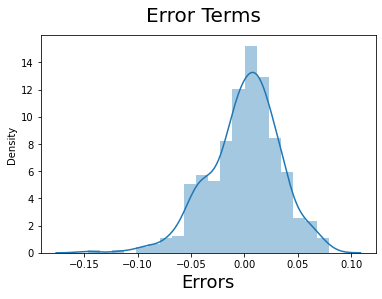

In [50]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### MAKING PREDICTION USING FINAL MODEL

In [51]:
df_test[['Chats', 'Sessions',
       'Direct Live Agent Sessions','Session Resolved Rate',
        'Session No Answer Rate', 'Resolved Sessions',
       'Switch to Live Agent Rate', 'Session Rec Not Accepted Rate',
       'Session Unsatisfied Rate', 'Click to Live Agent Sessions',
       'Click to Live Agent Rate', 'Intention to Live Agent Sessions',
       'Intention to Live Agent Rate']] = scaler.fit_transform(df_test)

In [52]:
y_test = df_test.pop('Session Resolved Rate')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 226 to 558
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Chats                             180 non-null    float64
 1   Sessions                          180 non-null    float64
 2   Direct Live Agent Sessions        180 non-null    float64
 3   Session No Answer Rate            180 non-null    float64
 4   Resolved Sessions                 180 non-null    float64
 5   Switch to Live Agent Rate         180 non-null    float64
 6   Session Rec Not Accepted Rate     180 non-null    float64
 7   Session Unsatisfied Rate          180 non-null    float64
 8   Click to Live Agent Sessions      180 non-null    float64
 9   Click to Live Agent Rate          180 non-null    float64
 10  Intention to Live Agent Sessions  180 non-null    float64
 11  Intention to Live Agent Rate      180 non-null    float64
dtypes: flo

In [53]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test = X_test[col1]
# Adding constant variable to test dataframe
X_test_lm3 = sm.add_constant(X_test)
X_test_lm3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 226 to 558
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         180 non-null    float64
 1   Direct Live Agent Sessions    180 non-null    float64
 2   Resolved Sessions             180 non-null    float64
 3   Click to Live Agent Rate      180 non-null    float64
 4   Intention to Live Agent Rate  180 non-null    float64
dtypes: float64(5)
memory usage: 8.4 KB


c:\Users\Daraz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [55]:
y_pred = lr3.predict(X_test_lm3)

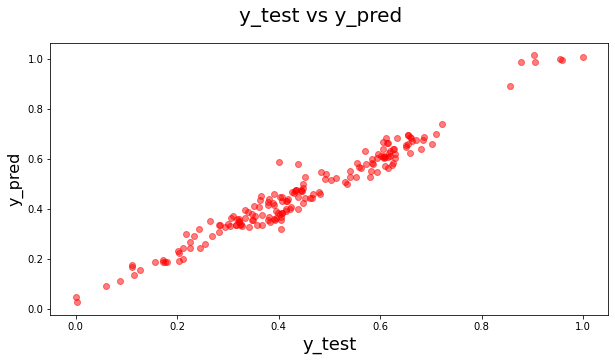

In [56]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize = (10,5))
plt.scatter(y_test, y_pred, alpha=.5, color = 'red')
fig.suptitle('y_test vs y_pred', fontsize = 20) # Plot heading 
plt.xlabel('y_test', fontsize = 18) # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [57]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.0016901396558184332


In [58]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.031998223843030665


In [59]:
r2_score(y_test, y_pred)

0.9498616363000614

In [60]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.04111130812584821


In [ ]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

NameError: name 'mlr' is not defined

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.72184344 0.72774445 0.77271321 0.68425034 0.69289316 0.63826688
 0.72444706 0.87286171 0.66102648 0.71249185 0.68643347 0.71437114
 0.70078323 0.65058864 0.7295285  0.69543327 0.73376818 0.66153274
 0.69923301 0.68685468 0.70527965 0.7974635  0.66162406 0.86328973
 0.72308518 0.66692512 0.77002711 0.68249404 0.71915882 0.66806827
 0.78609249 0.72537129 0.68777633 0.72650514 0.73177207 0.7190126
 0.75319347 0.69803541 0.85314555 0.64684174 0.71776598 0.74748953
 0.67706714 0.69585396 0.70165181 0.93900001 0.7268714  0.72185
 0.68791887 0.68820776 0.70450549 0.69341258 0.72925474 0.80072854
 0.69823173 0.70976873 0.71826494 0.70422812 0.71290148 0.70674527
 0.6943063 ]


In [ ]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
197,0.7309,0.721843
205,0.7406,0.727744
112,0.9391,0.772713
267,0.6638,0.684250
46,0.6929,0.692893


In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 79.30
Mean Absolute Error: 0.01587468301087752
Mean Square Error: 0.0007429932365072956
Root Mean Square Error: 0.027257902276354568


Text(0, 0.5, 'Predicted')

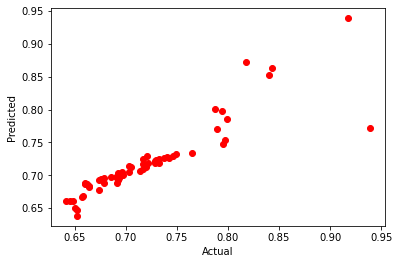

In [ ]:

plt.scatter(y_test,y_pred_mlr, color = 'red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot:xlabel='Session Resolved Rate'>

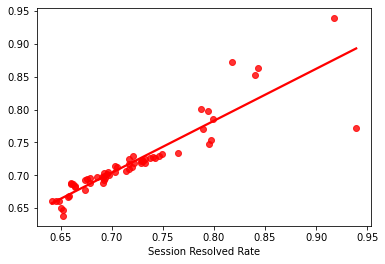

In [ ]:
sns.regplot(x=y_test, y=y_pred_mlr, ci=None, color ='red')

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_mlr,'Difference':y_test-y_pred_mlr})

In [ ]:
pred_df

,Actual Value,Predicted Value,Difference
197,0.7309,0.721843,0.009057
205,0.7406,0.727744,0.012856
112,0.9391,0.772713,0.166387
267,0.6638,0.684250,-0.020450
46,0.6929,0.692893,0.000007
...,...,...,...
209,0.7219,0.718265,0.003635
242,0.6927,0.704228,-0.011528
203,0.7054,0.712901,-0.007501
19,0.7143,0.706745,0.007555
